# TP1 : Prétraitement acoustique, Analyse en Composantes Principales et Classification par lois gaussiennes

NOM - PRÉNOM : 


In [113]:
import numpy as np
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import pickle

In [114]:
        ##################################################
        ### PARTIE 1 : Réduction de la dimensionnalité ###
        ##################################################

In [115]:
# Définition de la fonction lecture 
def lecture(classe, NbFichiers, Debug = False):
    # Initialisation
    obs = np.zeros((NbFichiers,24))

    # Traitement de chaque fichier
    for NoFichier in range(NbFichiers):

        file_path = "voyelles/Signal/"
        
        if NoFichier + 1 < 10:
            nb_fichier = "0" + str(NoFichier + 1)
        else:
            nb_fichier = str(NoFichier + 1)
            
        # Création du nom du fichier
        
        file_name = classe + nb_fichier + ".wav"

        if Debug:
            print(f"File name : {file_name}")
        
        # Lecture du fichier son
        
        fe,son = wav.read(file_path + file_name)
        if Debug :
            print(f"Sound {file_name} = {son} and sampling freq = {fe}")
            print("Original type: " + str(type(son[0]))) 
            
        # Conversion en float (optionnel)

        son = son/2**15
        
        if Debug :
            print(f"Sound (float) = {son}")
            print("Converted type: " + str(type(son[0]))) 

    
    # Calcul des 24 canaux d'énergie : vecteur de 24 dimensions
        
        can = canaux(son,fe)

        if Debug :
            print(f"24 channels = {can}")
    
        
        # Stockage dans une matrice de taille NbFichier x 24
        obs[NoFichier,:]  = can
        
        if Debug :
            print(f"Obs = {obs}")
            
    return(obs)

In [116]:
Debug  = True
# Lecture des 20 fichiers pour chacune des classes
obsaa = lecture('aa', 99, Debug)
obsuu = lecture('uu', 99, Debug)
obsii = lecture('ii', 99, Debug)
print(f"Shape obsaa : {obsaa.shape}, Shape obsuu : {obsuu.shape}, Shape obsii : {obsii.shape}")
print(f"Rang de obsaa : {np.linalg.matrix_rank(obsaa)}")
print(f"Rang de obsuu : {np.linalg.matrix_rank(obsuu)}")
print(f"Rang de obsii : {np.linalg.matrix_rank(obsii)}")


File name : aa01.wav
Sound aa01.wav = [ 5332  9357 10350 ... -3110 -2317 -1536] and sampling freq = 16000
Original type: <class 'numpy.int16'>
Sound (float) = [ 0.16271973  0.28555298  0.31585693 ... -0.09490967 -0.07070923
 -0.046875  ]
Converted type: <class 'numpy.float64'>
24 channels = [np.float64(1.6360574221588462), np.float64(67.11701766013019), np.float64(26.064056161869225), np.float64(2.563608056655272), np.float64(6.784706631726958), np.float64(25.91020487281844), np.float64(62.11600904643376), np.float64(54.15728483612048), np.float64(31.394367888603128), np.float64(52.86960923773423), np.float64(31.220944796846645), np.float64(41.17700509851994), np.float64(35.813985654329905), np.float64(3.3023287831097603), np.float64(13.711709065768684), np.float64(8.834710818013253), np.float64(36.95483498500421), np.float64(53.878743667127665), np.float64(19.454978862393965), np.float64(43.34229718253051), np.float64(11.712492002215061), np.float64(7.12872396901064), np.float64(2.617

In [117]:
print(obsaa)

[[ 1.63605742 67.11701766 26.06405616 ...  7.12872397  2.61782448
   3.87163552]
 [ 2.13655472 70.96434322 25.66211165 ...  6.46056173  2.65995724
   2.98013476]
 [ 1.44016105 55.70455016 26.09292506 ... 10.69996374  6.53518394
   6.65456852]
 ...
 [ 1.23420506 49.41350492 20.41682281 ...  3.61664157  1.8112419
   2.05559662]
 [ 1.67163244 49.1032586  16.53238305 ...  2.09549034  1.32642368
   0.88076697]
 [ 0.61565021 44.39418866 14.491764   ...  1.11981711  1.09264896
   0.36796876]]


In [118]:
# Créer une matrice contenant l'ensemble des observations à traiter
R = np.concatenate((obsaa, obsuu, obsii))

print(f"R = {R}\n")
print(f"Shape R = {np.shape(R)}\n")
print("Variance des colonnes de R :", np.var(R, axis=0))
print("\nRang de la matrice R :", np.linalg.matrix_rank(R))


R = [[ 1.63605742 67.11701766 26.06405616 ...  7.12872397  2.61782448
   3.87163552]
 [ 2.13655472 70.96434322 25.66211165 ...  6.46056173  2.65995724
   2.98013476]
 [ 1.44016105 55.70455016 26.09292506 ... 10.69996374  6.53518394
   6.65456852]
 ...
 [ 1.77727935 57.55113692 34.03784674 ...  1.72492354  0.85281112
   3.1984424 ]
 [ 1.39152506 50.35894138 37.05987419 ...  1.53161614  0.63777461
   2.01241304]
 [ 0.80250541 39.22157072 23.95432104 ...  0.67319462  0.30831443
   0.60405536]]

Shape R = (297, 24)

Variance des colonnes de R : [3.24815100e-01 1.56813125e+02 3.13296278e+02 4.86434139e+00
 4.70220381e+01 4.39723696e+01 3.34842365e+02 4.02204518e+02
 3.18867054e+02 3.09319441e+02 1.06036719e+02 2.98771103e+02
 9.49287804e+01 1.04317262e+01 1.48975189e+01 2.42376058e+01
 2.29512053e+02 3.45788767e+02 1.69731643e+02 2.01767015e+02
 3.85001065e+01 3.30180841e+00 6.64198097e-01 1.30289880e+00]

Rang de la matrice R : 24


In [119]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.

# COVARIANCE
covariance = np.cov(np.transpose(R))

if Debug:
    
    print(f"covariance = {covariance}\n")
    
    print(f"Shape de covariance : {covariance.shape}\n")
    print(f"Déterminant de la covariance : {np.linalg.det(covariance)}\n")





covariance = [[ 3.25912449e-01  3.92268760e+00  4.61732416e+00 -3.04922427e-01
   1.00708151e+00  4.73487478e-01 -6.76498758e-01 -2.44174149e+00
  -1.10138955e+00 -1.54991016e+00 -9.85523385e-01 -1.78448941e+00
  -6.75205525e-01 -3.52988806e-01 -3.24908103e-01 -1.20122242e-01
  -1.23167631e+00 -1.66459576e+00 -4.47801218e-03 -6.28754041e-02
   4.76421566e-01 -1.59358766e-02 -4.82597593e-02 -2.25130010e-02]
 [ 3.92268760e+00  1.57342899e+02  1.92581189e+02  1.15399411e+00
   5.08783976e+01  1.49038451e+01 -3.97334079e+01 -6.83494419e+01
  -6.66879156e+01 -6.33434775e+01 -4.64111857e+01 -7.68351434e+01
  -3.86141094e+01 -1.31823689e+01 -1.56633833e+01 -1.40060157e+01
  -6.43889282e+01 -7.24514209e+01 -2.27011748e+01 -1.11257051e+01
   8.89890934e+00 -1.45475481e+00 -1.74972550e+00  7.19949525e-02]
 [ 4.61732416e+00  1.92581189e+02  3.14354711e+02  6.69820555e+00
   7.07784668e+01 -1.59932348e+01 -1.61076513e+02 -1.69184798e+02
  -1.72149917e+02 -1.68237150e+02 -1.16106150e+02 -1.90286511

In [120]:
# Valeurs et vecteurs propres
[Lambda, V] = linalg.eig(covariance)

#NOTE
# La décomposition en valeurs propres de la matrice de covariance permet d'identifier les
# axes principaux de variation des données. Ces axes sont appelés "composantes principales" en ACP.
# En gros les eigen vectors c'est les vecteur qui ont toujours le meme point de depart et d'arrivé apres une transformation

if Debug :
    print(f"Lambda = {Lambda}\n")
    print(f"V = {V}\n")
    print(f"Shape de V = {np.shape(V)}\n")
    print(f"Shape de lambda = {np.shape(Lambda)}\n")

    explained_variance_ratio = Lambda / np.sum(Lambda)
    print("Variance expliquée par chaque composante :", explained_variance_ratio)

#NOTE
# La variance expliquée par chaque composante principale correspond à la part de l'information
# capturée par chaque axe propre.
# Une valeur propre élevée signifie que la direction associée (vecteur propre) contient une part
# importante de la variance totale des données.
# En divisant chaque valeur propre par la somme des valeurs propres, on obtient un ratio qui
# indique l'importance relative de chaque composante principale.


Lambda = [2.31638059e+03+0.j 3.63059105e+02+0.j 3.30820558e+02+0.j
 2.18986383e+02+0.j 6.07563029e+01+0.j 6.05362250e+01+0.j
 4.96740301e+01+0.j 2.16242213e+01+0.j 1.56328543e+01+0.j
 1.01012224e+01+0.j 8.42036880e+00+0.j 7.12031975e+00+0.j
 4.74646262e+00+0.j 3.80831068e+00+0.j 3.38439262e+00+0.j
 2.75162742e+00+0.j 2.38331315e+00+0.j 1.40389189e+00+0.j
 4.83721044e-01+0.j 7.05794018e-02+0.j 1.47731280e-01+0.j
 1.97626597e-01+0.j 2.58715773e-01+0.j 3.77432503e-01+0.j]

V = [[-2.37727466e-03  9.24730704e-03 -1.01990516e-02  8.98032490e-03
  -7.72070547e-03 -1.23316668e-03  1.11002401e-02 -1.61756730e-03
   6.94547828e-03 -1.75810416e-02  2.64169557e-02 -3.89825431e-03
  -9.36580288e-03 -3.42854799e-02 -3.77879931e-02 -2.92875188e-02
  -3.08268999e-02 -3.93096565e-03  8.69471012e-02 -4.46499960e-02
  -2.98622226e-01  9.31654542e-01 -1.64468537e-01 -1.39078971e-02]
 [-1.04290295e-01  3.22092784e-01 -4.80619665e-01  2.12498670e-01
  -1.60992704e-01  3.77355373e-02 -2.98214257e-02  1.04839

In [121]:
# Pour cela, 
# 1 - Rechercher les deux valeurs propres maximales 

# Trier les indices des valeurs propres par ordre décroissant
indices_tries = np.argsort(Lambda)[::-1]  # [::-1] pour trier dans l'ordre décroissant

# Sélectionner les deux plus grandes valeurs propres
max = Lambda[indices_tries[:2]]

print(f"Les deux plus grandes valeurs propres sont : {max}")

Les deux plus grandes valeurs propres sont : [2316.38058933+0.j  363.05910517+0.j]


In [122]:
# Trier les indices des valeurs propres par ordre décroissant
indices_tries = np.argsort(Lambda)[::-1]

# Sélectionner les deux plus grandes valeurs propres
max_Lambda = Lambda[indices_tries[:2]]

# Sélectionner les vecteurs propres associés
W = V[:, indices_tries[:2]]

if Debug:
    print("Matrice de passage W :", W)
    print("\n")
    print(f"Shape de W : {W.shape}\n")  # Doit être (24,2)


Matrice de passage W : [[-0.00237727  0.00924731]
 [-0.10429029  0.32209278]
 [-0.24480119  0.44965807]
 [-0.00999786  0.0031003 ]
 [-0.08273806 -0.0855686 ]
 [ 0.08797397 -0.03611986]
 [ 0.3329983  -0.16230562]
 [ 0.35686061 -0.0765203 ]
 [ 0.27760798 -0.06864789]
 [ 0.33484093  0.02120512]
 [ 0.20832166 -0.03535886]
 [ 0.35586558 -0.02269586]
 [ 0.1821845  -0.02687936]
 [ 0.06217545 -0.00210687]
 [ 0.07772961  0.01247679]
 [ 0.06809389  0.14316709]
 [ 0.29022884  0.13217304]
 [ 0.37350734  0.13530572]
 [ 0.14310442  0.47608086]
 [ 0.15440431  0.53102571]
 [ 0.0068244   0.27718256]
 [ 0.02873618  0.04771018]
 [ 0.01447657  0.01041993]
 [ 0.01293935  0.0346845 ]]


Shape de W : (24, 2)



In [123]:
# 3-  Projeter R dans ce nouvel espace 
Rproj = np.dot(R,W)

obs_par_classe = int(len(Rproj)/3) #ON a 3 classes représentées dans 5 et chacune a le meme nombre d'obs

if Debug:
    print(Rproj)
    print(np.shape(Rproj))
    print(obs_par_classe)


aaproj = Rproj[:obs_par_classe,:]
if Debug:
    print(aaproj)
    print(np.shape(aaproj))

uuproj = Rproj[obs_par_classe:obs_par_classe*2,:]

if Debug:
    print(uuproj)
    print(np.shape(uuproj))

iiproj = Rproj[obs_par_classe*2:,:]

if Debug:
    print(iiproj)
    print(np.shape(iiproj))


[[ 1.24991271e+02  6.32130529e+01]
 [ 1.11079819e+02  6.34682696e+01]
 [ 1.61747302e+02  7.97849507e+01]
 [ 1.25888645e+02  6.22419562e+01]
 [ 1.16400987e+02  6.45465703e+01]
 [ 1.34128312e+02  6.92965582e+01]
 [ 1.18342045e+02  5.93224615e+01]
 [ 1.15225851e+02  6.08098752e+01]
 [ 1.44376016e+02  6.99191903e+01]
 [ 1.39880868e+02  7.12253644e+01]
 [ 1.31794999e+02  6.82242495e+01]
 [ 1.48462496e+02  8.00913404e+01]
 [ 1.36585185e+02  7.40076285e+01]
 [ 9.68524063e+01  4.80754461e+01]
 [ 1.56114815e+02  6.84095633e+01]
 [ 1.14282563e+02  5.74568975e+01]
 [ 9.89721948e+01  4.96388223e+01]
 [ 1.44611443e+02  6.18509062e+01]
 [ 8.60013101e+01  4.34270178e+01]
 [ 8.58411825e+01  4.85269732e+01]
 [ 1.07041327e+02  4.52426483e+01]
 [ 8.60493677e+01  4.28239404e+01]
 [ 8.38420389e+01  4.98131080e+01]
 [ 1.10542258e+02  5.59182784e+01]
 [ 8.44967884e+01  4.20623029e+01]
 [ 1.40635641e+02  8.30587242e+01]
 [ 7.44145530e+01  4.80881939e+01]
 [ 6.53425801e+01  4.39243969e+01]
 [ 8.52080366e+01  4

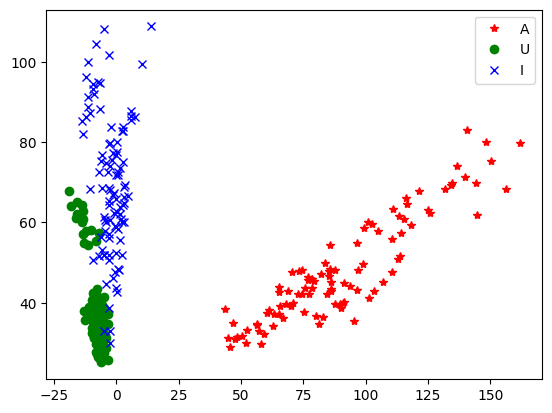

In [124]:
# 4- Affichage
# Nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes + légende
plt.figure(1)
plt.plot(aaproj[:, 0], aaproj[:, 1], 'r*', label="A")
plt.plot(uuproj[:, 0], uuproj[:, 1], 'go', label="U")
plt.plot(iiproj[:, 0], iiproj[:, 1], 'bx', label="I")
plt.legend()
plt.show()

In [125]:
"""W = V[:,:]

# 3-  Projeter R dans ce nouvel espace 
Rproj = np.dot(R,W)

aaproj = Rproj[:20,:]
if Debug:
    print(aaproj)
    print(np.shape(aaproj))
    
uuproj = Rproj[20:40,:]

if Debug:
    print(uuproj)
    print(np.shape(uuproj))
iiproj = Rproj[40:,:]

if Debug:
    print(iiproj)
    print(np.shape(iiproj))

# 4- Affichage
# Nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes + légende
plt.figure(1)
plt.plot(aaproj[:, 0], aaproj[:, 1], 'r*', label="A")
plt.plot(uuproj[:, 0], uuproj[:, 1], 'go', label="U")
plt.plot(iiproj[:, 0], iiproj[:, 1], 'bx', label="I")
plt.legend()
plt.show()"""

'W = V[:,:]\n\n# 3-  Projeter R dans ce nouvel espace \nRproj = np.dot(R,W)\n\naaproj = Rproj[:20,:]\nif Debug:\n    print(aaproj)\n    print(np.shape(aaproj))\n    \nuuproj = Rproj[20:40,:]\n\nif Debug:\n    print(uuproj)\n    print(np.shape(uuproj))\niiproj = Rproj[40:,:]\n\nif Debug:\n    print(iiproj)\n    print(np.shape(iiproj))\n\n# 4- Affichage\n# Nuages de points de chacune des classes de sons sur une même figure en les différenciant \n# par des couleurs ou une forme de tracé de points différentes + légende\nplt.figure(1)\nplt.plot(aaproj[:, 0], aaproj[:, 1], \'r*\', label="A")\nplt.plot(uuproj[:, 0], uuproj[:, 1], \'go\', label="U")\nplt.plot(iiproj[:, 0], iiproj[:, 1], \'bx\', label="I")\nplt.legend()\nplt.show()'

valeurs propres min = (0.3774325030702124+0j) et (0.2587157727936668+0j)
[[ 1.41300771 -0.34112044]
 [-0.64798129 -0.28539778]
 [-2.49195303  3.00671473]
 [ 0.03739184 -1.42580415]
 [ 0.51144142 -1.31345652]
 [-0.59564239 -1.94995986]
 [ 0.13774656  0.20959832]
 [-0.79287214 -0.74343311]
 [-1.78363365 -0.08837956]
 [ 1.48651036 -0.45601071]
 [ 0.17420355 -0.07532463]
 [-1.88632497  0.14663977]
 [ 0.46096685  0.15307976]
 [ 0.00367447 -2.93988414]
 [ 1.24357244 -1.79240551]
 [ 0.79546928 -0.80518744]
 [-0.39763051 -1.70339588]
 [-0.38306058  0.02755536]
 [ 1.44040542 -0.62017343]
 [ 0.8339162  -1.25721376]]
(20, 2)
[[ 1.27180902 -2.12360345]
 [-1.09334817 -0.9894609 ]
 [-1.02669413 -1.60555188]
 [-1.6407948   0.15532754]
 [ 0.60408237 -0.26607824]
 [ 0.53166639 -0.95802051]
 [ 0.0274919  -0.17490744]
 [-0.49166523 -0.82725884]
 [ 0.15207256 -1.30204765]
 [-0.43722202 -1.2406849 ]
 [ 0.08166259 -1.04214386]
 [-1.36619376 -1.25696602]
 [-0.3310315  -1.49736507]
 [ 0.12639076 -1.32538751]


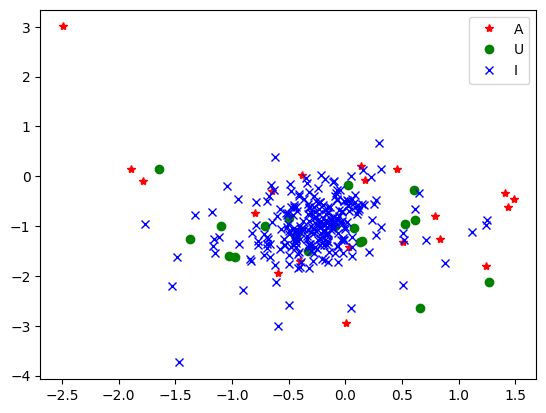

In [126]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# Que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?
# Pour cela, 
# 5- Rechercher les deux valeurs propres minimales

min = Lambda[-1],Lambda[-2]
print(f"valeurs propres min = {Lambda[-1]} et {Lambda[-2]}")

W_min = V[:,-2:]

# 3-  Projeter R dans ce nouvel espace 
Rproj_min = np.dot(R,W_min)

aaproj_min = Rproj_min[:20,:]
if Debug:
    print(aaproj_min)
    print(np.shape(aaproj_min))
uuproj_min = Rproj_min[20:40,:]

if Debug:
    print(uuproj_min)
    print(np.shape(uuproj_min))
iiproj_min = Rproj_min[40:,:]

if Debug:
    print(iiproj_min)
    print(np.shape(iiproj_min))

# 4- Affichage
# Nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes + légende
plt.figure(1)
plt.plot(aaproj_min[:, 0], aaproj_min[:, 1], 'r*', label="A")
plt.plot(uuproj_min[:, 0], uuproj_min[:, 1], 'go', label="U")
plt.plot(iiproj_min[:, 0], iiproj_min[:, 1], 'bx', label="I")
plt.legend()
plt.show()

In [127]:
        ######################################################
        ### PARTIE 2 : Classification par lois gaussiennes ###
        ######################################################

In [128]:
# 1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. PARTIE 1)
print(np.shape(app_aa))
print(np.shape(app_ii))
print(np.shape(app_uu))

print(app_aa.T[0])
print(app_aa)

(80, 2)
(80, 2)
(80, 2)
[ 27.94649426  23.14986615  23.00731261   1.45004927  14.50312045
   8.20853606   1.52548402   9.04626393  12.75436068  -0.23600434
   6.06083643   6.72739394   2.51335688   1.84464067  17.41859287
  10.30846081  16.98414635  21.11818768  23.63109776  34.11440276
  28.62754729  10.55791287  16.23432234   7.63526955   9.09241069
  19.85552283 -10.37307836  14.09085022  12.08950055   8.47399676
  14.73269077  16.77701564  -0.79536829  16.82922543  19.53041206
  -5.72847323   9.9622991   17.41776732   4.71090514  16.0544869
  14.25882042  10.36654504  18.81078848  19.64990741  11.55162657
  13.56541674  15.6839111   -1.01159673  11.78139107  12.56939701
   5.65686808  19.87766468  18.50757288  14.94299836  19.33283083
  18.92754119  11.80797537  19.97805023  16.04466888   8.0762442
  16.82687668  18.06056353  16.97056548  10.29529234  15.35291253
 -12.88260035  21.42979276  17.57584742  14.76362367  18.27917667
  20.67707364  21.06512391  15.05925617  12.5129209   

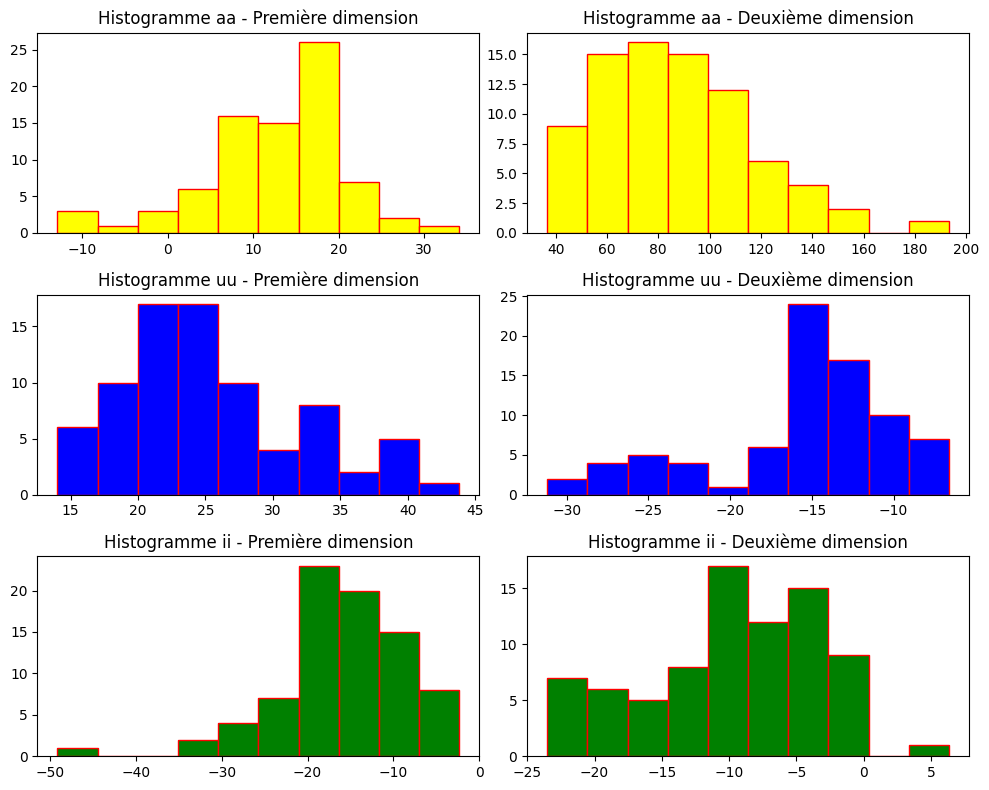

On constate que la distribution suit une loi gaussienne


In [129]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.
# Création de la figure
plt.figure(figsize=(10, 8))

# Histogrammes pour la classe aa
plt.subplot(3, 2, 1)
plt.hist(app_aa.T[0], color='yellow', edgecolor='red')
plt.title('Histogramme aa - Première dimension')

plt.subplot(3, 2, 2)
plt.hist(app_aa.T[1], color='yellow', edgecolor='red')
plt.title('Histogramme aa - Deuxième dimension')

# Histogrammes pour la classe uu
plt.subplot(3, 2, 3)
plt.hist(app_uu.T[0], color='blue', edgecolor='red')
plt.title('Histogramme uu - Première dimension')

plt.subplot(3, 2, 4)
plt.hist(app_uu.T[1], color='blue', edgecolor='red')
plt.title('Histogramme uu - Deuxième dimension')

# Histogrammes pour la classe ii
plt.subplot(3, 2, 5)
plt.hist(app_ii.T[0], color='green', edgecolor='red')
plt.title('Histogramme ii - Première dimension')

plt.subplot(3, 2, 6)
plt.hist(app_ii.T[1], color='green', edgecolor='red')
plt.title('Histogramme ii - Deuxième dimension')

# Ajustement des espacements
plt.tight_layout()

# Affichage
plt.show()


# Que pouvez-vous conclure ? 
print("On constate que la distribution suit une loi gaussienne")

On peut constater que les distributions peuvent être modélisées par des lois gaussiennes.

In [130]:
# 3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe

m_aa = np.mean(app_aa, axis=0)
c_aa = np.cov(app_aa)
m_uu = np.mean(app_uu, axis=0)
c_uu = np.cov(app_uu)
m_ii = np.mean(app_ii, axis=0)
c_ii = np.cov(app_ii)
print(np.linalg.det(c_uu))
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 
print(f"Moyenne de aa : {m_aa}")
print(f"Covariance de aa : {c_aa}")
print(f"Shape de moyenne aa : {np.shape(m_aa)}")
print(f"Shape de la covariance de aa : {np.shape(c_aa)}")

0.0
Moyenne de aa : [12.73410809 86.9221835 ]
Covariance de aa : [[13664.35022341  7579.59099294  6396.5206786  ...  4496.85845452
   3410.07604595  4691.18497788]
 [ 7579.59099294  4204.38576887  3548.13875003 ...  2494.39946145
   1891.56317428  2602.19204157]
 [ 6396.5206786   3548.13875003  2994.3229003  ...  2105.05787855
   1596.31607701  2196.02551365]
 ...
 [ 4496.85845452  2494.39946145  2105.05787855 ...  1479.8900518
   1122.23626056  1543.84178425]
 [ 3410.07604595  1891.56317428  1596.31607701 ...  1122.23626056
    851.01877872  1170.73239917]
 [ 4691.18497788  2602.19204157  2196.02551365 ...  1543.84178425
   1170.73239917  1610.55711665]]
Shape de moyenne aa : (2,)
Shape de la covariance de aa : (80, 80)


In [131]:
# 4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :

def log_densite_gaussienne(x, moyenne, covariance):
    """
    Calcule la log-densité de probabilité d'une observation x sous une loi normale multidimensionnelle.
    """
    d = len(x)  # Dimension de l'observation
    det_cov = np.linalg.det(covariance)

    # Éviter les erreurs numériques si le déterminant est trop petit
    if det_cov == 0:
        raise ValueError("La matrice de covariance est singulière, elle ne peut pas être inversée.")

    inv_cov = np.linalg.inv(covariance)  # Inverse de la matrice de covariance

    # Calcul de la log-vraisemblance gaussienne
    terme1 = -0.5 * np.log((2 * np.pi) ** d * det_cov)
    terme2 = -0.5 * np.dot((x - moyenne).T, np.dot(inv_cov, (x - moyenne)))

    return terme1 + terme2

def classer(observation, moyenne_aa, covariance_aa, moyenne_uu, covariance_uu, moyenne_ii, covariance_ii):
    
    log_proba_aa = log_densite_gaussienne(observation, moyenne_aa, covariance_aa)
    log_proba_uu = log_densite_gaussienne(observation, moyenne_uu, covariance_uu)
    log_proba_ii = log_densite_gaussienne(observation, moyenne_ii, covariance_ii)

    log_probas = [log_proba_aa, log_proba_uu, log_proba_ii]
    classes = ["aa", "uu", "ii"]
    no_classe = classes[np.argmax(log_probas)]

    return no_classe




#Test
print(obsaa.shape)
print(m_aa.shape)

no_classe = classer(obsaa[0],m_aa,c_aa,m_uu,c_uu,m_ii,c_ii)


(99, 24)
(2,)


ValueError: La matrice de covariance est singulière, elle ne peut pas être inversée.

Je ne comprend pas pourquoi je trouve des matrices covariancesigulieres donc non inversibles. Je pensais qu'utiliser 20 observations par classe causait le problème parceque le nombre d'obs etait inférieur aux dimentions d'une observation mais les tests avec 20 obsevations par classet et pour 99 on donné le meme problème. Je vais tester en utilisant la pseudo inverse comme vu en TP de modélisation avec les jacobiennes singulières.

In [133]:
# 4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe)
# sur l'observation fournie en entrée :

def log_densite_gaussienne(x, moyenne, covariance):
    """
    Calcule la log-densité de probabilité d'une observation x sous une loi normale multidimensionnelle.
    """
    d = len(x)  # Dimension de l'observation

    # Calcul du déterminant de la covariance
    det_cov = np.linalg.det(covariance)
    if det_cov == 0:
        det_cov = np.prod(np.linalg.svd(covariance, compute_uv=False))  # Utilise une approximation

    inv_cov = np.linalg.pinv(covariance)  # Pseudo-inverse

    # Calcul de la log-vraisemblance gaussienne
    terme1 = -0.5 * np.log((2 * np.pi) ** d * det_cov)
    terme2 = -0.5 * np.dot((x - moyenne).T, np.dot(inv_cov, (x - moyenne)))

    return terme1 + terme2


def classer(observation, moyenne_aa, covariance_aa, moyenne_uu, covariance_uu, moyenne_ii, covariance_ii):

    log_proba_aa = log_densite_gaussienne(observation, moyenne_aa, covariance_aa)
    log_proba_uu = log_densite_gaussienne(observation, moyenne_uu, covariance_uu)
    log_proba_ii = log_densite_gaussienne(observation, moyenne_ii, covariance_ii)

    log_probas = [log_proba_aa, log_proba_uu, log_proba_ii]
    classes = ["aa", "uu", "ii"]
    no_classe = classes[np.argmax(log_probas)]

    return no_classe




#Test
print(obsaa.shape)
print(m_aa.shape)

no_classe = classer(aaproj[0], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
print("Classe prédite :", no_classe)


(99, 24)
(2,)


C:\Users\othma\AppData\Local\Temp\ipykernel_16816\3037254647.py:19: RuntimeWarning: divide by zero encountered in log
  terme1 = -0.5 * np.log((2 * np.pi) ** d * det_cov)


ValueError: shapes (80,80) and (2,) not aligned: 80 (dim 1) != 2 (dim 0)

In [28]:
# 5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
ft = open('TST.pkl', 'rb')
dicoTST = pickle.load(ft)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
ft.close()

# Vérifier leurs dimensions
# à compléter

In [29]:
# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

# A tester pour vérifier votre fonction "classer" !

In [30]:
# 6- Définir la fonction tout_tester qui effectue tous les tests de classification 

def tout_tester(tst_aa, tst_uu, tst_ii, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    matrice_confusion = np.zeros((3,3))
    
    # à compléter
    
    taux_reco = # à compléter
    
    return(matrice_confusion, taux_reco)
    

SyntaxError: invalid syntax (1340402675.py, line 8)

In [ ]:
# 7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
mat_conf, score = tout_tester(tst_aa, tst_uu, tst_ii, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
print(mat_conf)
print(score)

# Commenter les résultats obtenus
# à compléter 